Original Data Head:
   feature1  feature2  class
0  0.830604 -0.440173      1
1  0.721014  0.821057      0
2  1.027758 -0.491089      1
3 -0.305040  0.958752      0
4  0.300717  1.075275      0




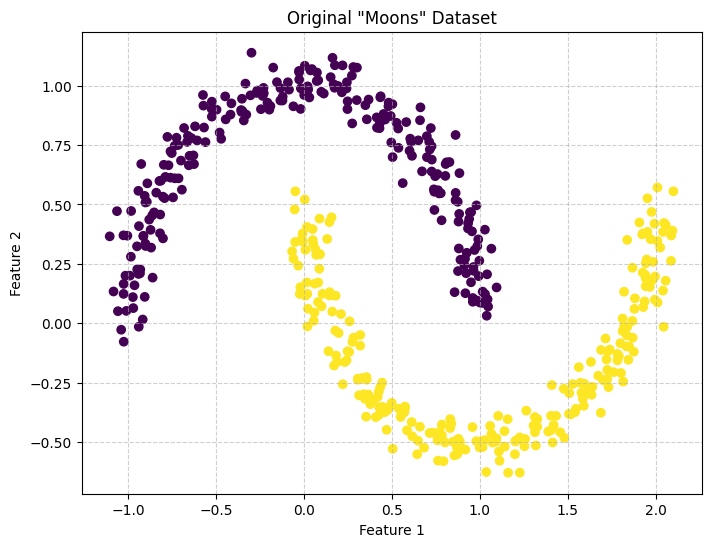

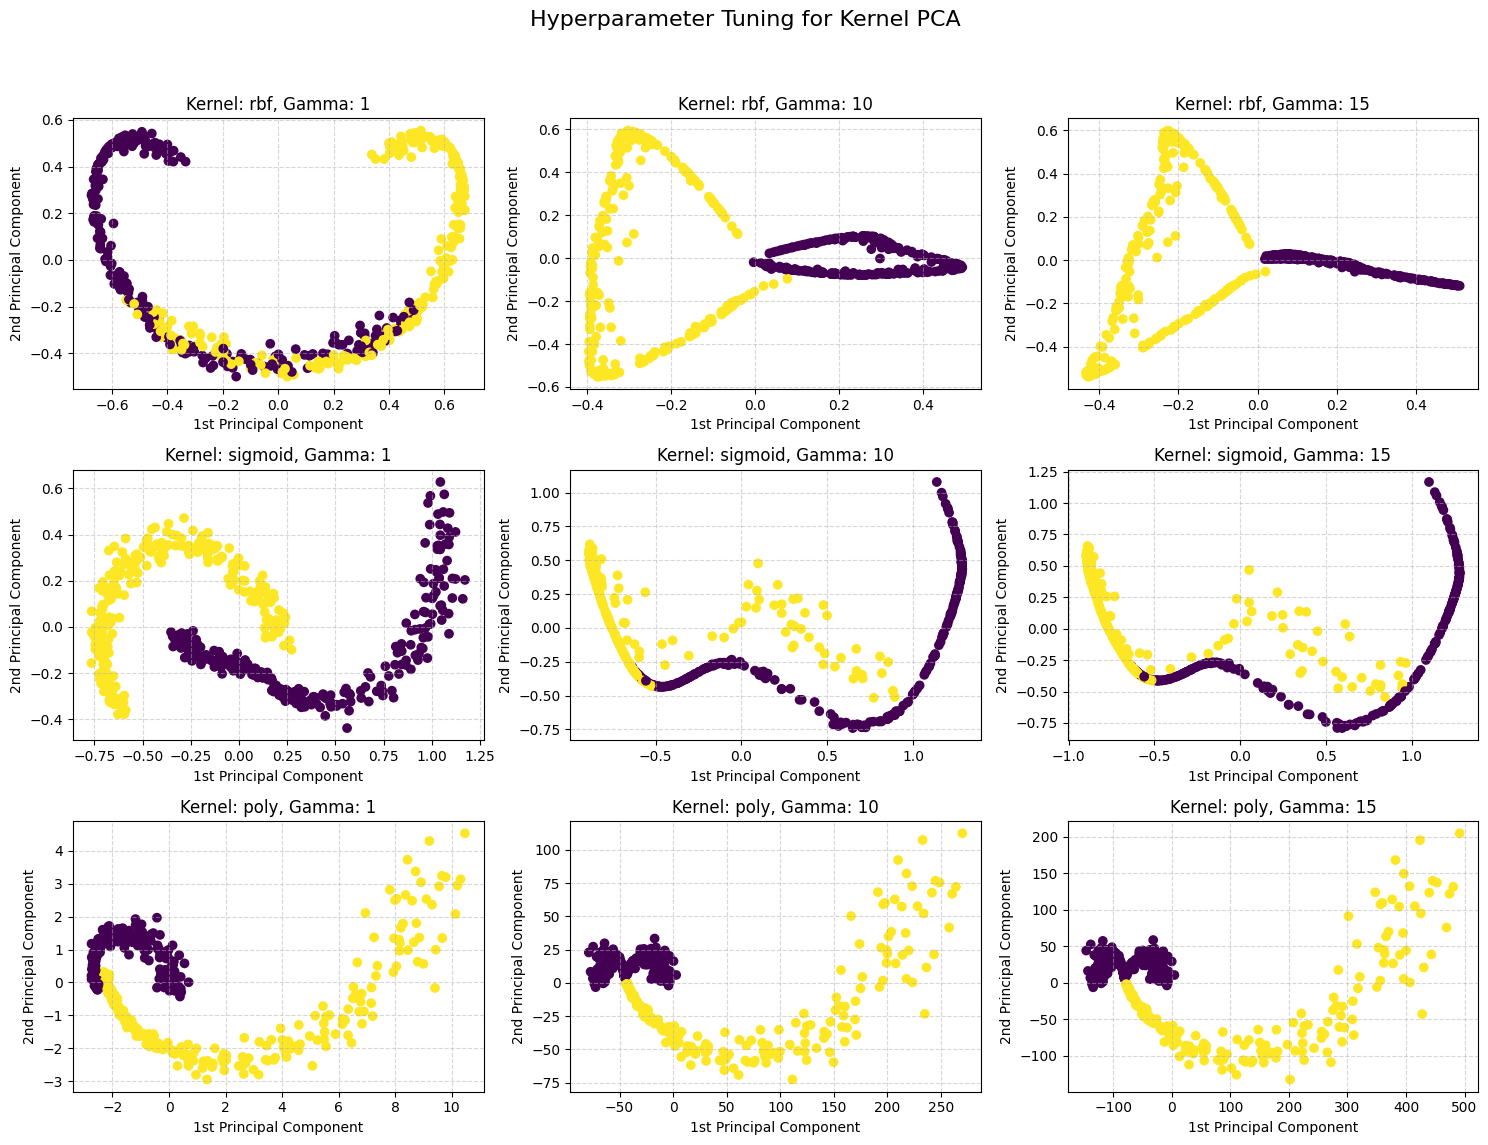

Hyperparameter Tuning Grid Search Results:
    kernel  gamma                                 separation_quality
0      rbf      1      Visual inspection needed for rbf with gamma=1
1      rbf     10     Visual inspection needed for rbf with gamma=10
2      rbf     15     Visual inspection needed for rbf with gamma=15
3  sigmoid      1  Visual inspection needed for sigmoid with gamma=1
4  sigmoid     10  Visual inspection needed for sigmoid with gamm...
5  sigmoid     15  Visual inspection needed for sigmoid with gamm...
6     poly      1     Visual inspection needed for poly with gamma=1
7     poly     10    Visual inspection needed for poly with gamma=10
8     poly     15    Visual inspection needed for poly with gamma=15


Applying final KPCA with kernel='rbf' and gamma=15...



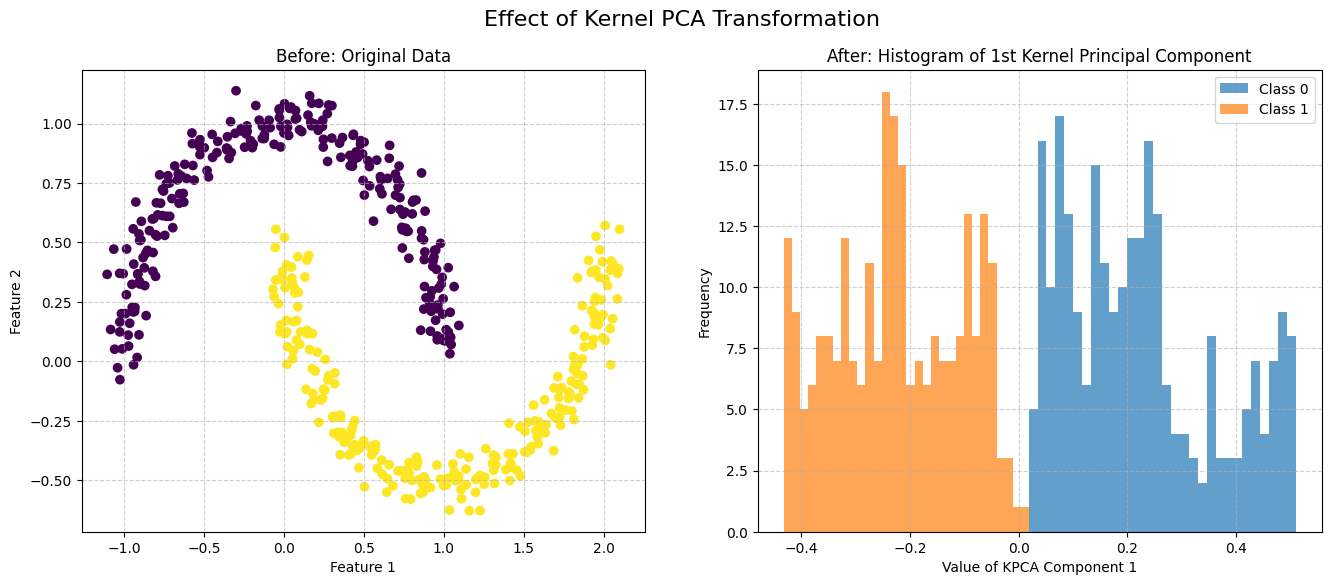

Final DataFrame with KPCA Component:
   feature1  feature2  class  kpca_component_1
0  0.830604 -0.440173      1         -0.345046
1  0.721014  0.821057      0          0.156590
2  1.027758 -0.491089      1         -0.325972
3 -0.305040  0.958752      0          0.395355
4  0.300717  1.075275      0          0.299037


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

# --- When to Use Kernel PCA (KPCA) and Data Requirements ---
#
# When to use:
# Kernel PCA is an extension of standard PCA used for dimensionality reduction.
# You should use KPCA when your data has complex, non-linear relationships
# that cannot be separated by a linear plane. Standard PCA would fail in such
# scenarios because it only works with linear transformations. KPCA first maps
# the data to a higher-dimensional space where it becomes linearly separable,
# and then applies PCA in that space. It's powerful for feature extraction
# on non-linear datasets, often as a pre-processing step for classification tasks.
#
# Data Requirements:
# 1. Numerical Data: KPCA works with numerical, continuous features.
#    Categorical data must be encoded into a numerical format.
# 2. Scaling: Like standard PCA, KPCA is sensitive to the scale of the features.
#    It is highly recommended to scale your data (e.g., using StandardScaler)
#    before applying KPCA.

# --- 1. Load a Sample Dataset ---
# We'll use the `make_moons` dataset from scikit-learn. This is a classic
# example of a dataset that is not linearly separable, making it ideal for KPCA.
X, y = make_moons(n_samples=500, noise=0.06, random_state=42)

# Create a pandas DataFrame for easier manipulation and visualization
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['class'] = y

print("Original Data Head:")
print(df.head())
print("\n")


# --- 2. Visualize the Original Data ---
# A quick scatter plot shows why linear methods would fail.
plt.figure(figsize=(8, 6))
plt.scatter(df['feature1'], df['feature2'], c=df['class'], cmap='viridis')
plt.title('Original "Moons" Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# --- 3. Hyperparameter Tuning (Manual Grid Search) ---
# KPCA's most important hyperparameters are `kernel` and `gamma`.
# - `kernel`: The kernel function to use ('rbf', 'poly', 'sigmoid', 'cosine', etc.).
# - `gamma`: The kernel coefficient for 'rbf', 'poly', and 'sigmoid'.
# We will test a few combinations and visualize the results to pick the best one.
# The "best" parameters are those that achieve the best linear separation in the new feature space.

kernels = ['rbf', 'sigmoid', 'poly']
gammas = [1, 10, 15]

fig, axes = plt.subplots(len(kernels), len(gammas), figsize=(15, 12))
fig.suptitle('Hyperparameter Tuning for Kernel PCA', fontsize=16)

results_list = []

for i, kernel in enumerate(kernels):
    for j, gamma in enumerate(gammas):
        # Apply KPCA with the current set of parameters
        kpca_tuning = KernelPCA(n_components=2, kernel=kernel, gamma=gamma, random_state=42)
        X_kpca_tuning = kpca_tuning.fit_transform(X)

        # Store results
        result = {
            'kernel': kernel,
            'gamma': gamma,
            'separation_quality': f"Visual inspection needed for {kernel} with gamma={gamma}"
        }
        results_list.append(result)

        # Visualize the transformed data
        ax = axes[i, j]
        ax.scatter(X_kpca_tuning[:, 0], X_kpca_tuning[:, 1], c=y, cmap='viridis')
        ax.set_title(f'Kernel: {kernel}, Gamma: {gamma}')
        ax.set_xlabel('1st Principal Component')
        ax.set_ylabel('2nd Principal Component')
        ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display the results in a DataFrame
tuning_results_df = pd.DataFrame(results_list)
print("Hyperparameter Tuning Grid Search Results:")
print(tuning_results_df)
print("\n")


# --- 4. Apply Kernel PCA with Chosen Parameters ---
# From the visualizations above, the 'rbf' kernel with gamma=15 appears to
# provide a very clear linear separation of the two classes along the first
# principal component. We will use these parameters for our final transformation.

print("Applying final KPCA with kernel='rbf' and gamma=15...\n")
# Instantiate KernelPCA with the chosen "best" hyperparameters
# We select n_components=1 because the data is clearly separable on one axis.
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15, random_state=42)

# Fit the model to the data and transform it.
# We select the features to work with here.
features_to_transform = df[['feature1', 'feature2']]
df['kpca_component_1'] = kpca.fit_transform(features_to_transform)


# --- 5. Show the Result of the Transformation ---
# We've already added the new principal component as a column to our DataFrame.
# Now, let's create a "before-and-after" visualization to clearly show the effect.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Before: Original Data
ax1.scatter(df['feature1'], df['feature2'], c=df['class'], cmap='viridis')
ax1.set_title('Before: Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.grid(True, linestyle='--', alpha=0.6)

# After: Transformed Data (Histogram of the new component)
# A histogram is a great way to see the separation achieved on the new single dimension.
ax2.hist(df.loc[df['class'] == 0, 'kpca_component_1'], bins=30, alpha=0.7, label='Class 0')
ax2.hist(df.loc[df['class'] == 1, 'kpca_component_1'], bins=30, alpha=0.7, label='Class 1')
ax2.set_title('After: Histogram of 1st Kernel Principal Component')
ax2.set_xlabel('Value of KPCA Component 1')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Effect of Kernel PCA Transformation', fontsize=16)
plt.show()


# --- 6. Print the Head of the Resulting DataFrame ---
# The final DataFrame now includes the new feature derived from KPCA.
# This new feature can now be used in a machine learning model.
print("Final DataFrame with KPCA Component:")
print(df.head())
